# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Ingenium Canada Museum Collection](https://ingeniumcanada.org/centre/the-ingenium-research-institute) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [1]:
##setup code to load image, use Counter and make plots
from PIL import Image
import requests
from io import BytesIO #https://newbedev.com/python-how-to-load-image-from-url-in-python-code-example

from collections import Counter

import matplotlib.pyplot as plt

##Setup code to load in the dataset 
import numpy as np
file = open('../data/museum_data_assignment-1.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset = np.array([x for x in dataset if not x[2] == "Unknown"])
dataset[:,2] = [int(x) for x in dataset[:,2]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]
dataset[:,7] = [float(x[:-2]) for x in dataset[:,7]]
dataset[:,8] = [float(x[:-2]) for x in dataset[:,8]]
print("Column names\n")
print(headings)
print("\nDataset Shape\n")
print(dataset.shape)

dataset[1]

Column names

['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material'
 'Length' 'Width' 'Height' 'image']

Dataset Shape

(6738, 10)


array(['1966.0018.001', 'Propeller', 1910, 'Transport', 'Aircraft parts',
       'wood->ash;metal->brass;metal->tin', 214.0, 22.0, 10.8,
       'http://source.techno-science.ca/artifacts-artefacts/images/1966.0018.001.aa.cs.png'],
      dtype=object)

### Question 1

Using either ``sorted()`` or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=max#numpy.argmax), find and display the images for 

    - Longest
    
    - Widest 
    
    - Tallest 
    
items in the dataset

**You will have to do some extra research to find out how to display images in a Jupyter notebook**

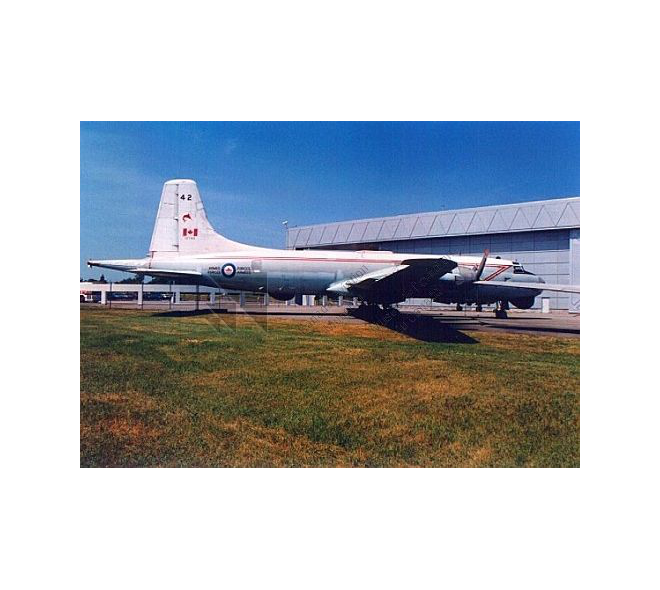

In [2]:
#sort dataset by length (6th in the column), rank from the biggest data to the smallest
length_sorted_dataset = sorted(dataset, key=lambda x: x[6], reverse = True) 
#list the item (url) on the first row (longest) 
length_url = length_sorted_dataset[0][9]
#load image, https://newbedev.com/python-how-to-load-image-from-url-in-python-code-example
response = requests.get(length_url)
img_longest = Image.open(BytesIO(response.content))
img_longest

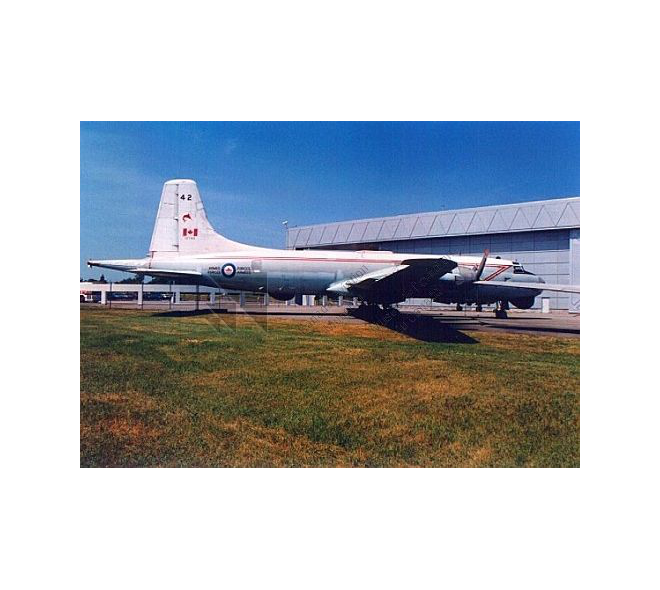

In [3]:
#sort dataset by width (7th in the column), rank from the biggest data to the smallest
width_sorted_dataset = sorted(dataset, key=lambda x: x[7], reverse = True) 
#list the item (url) on the first row (longest) 
width_url = width_sorted_dataset[0][9]
#load image, https://newbedev.com/python-how-to-load-image-from-url-in-python-code-example
response = requests.get(width_url)
img_widest = Image.open(BytesIO(response.content))
img_widest

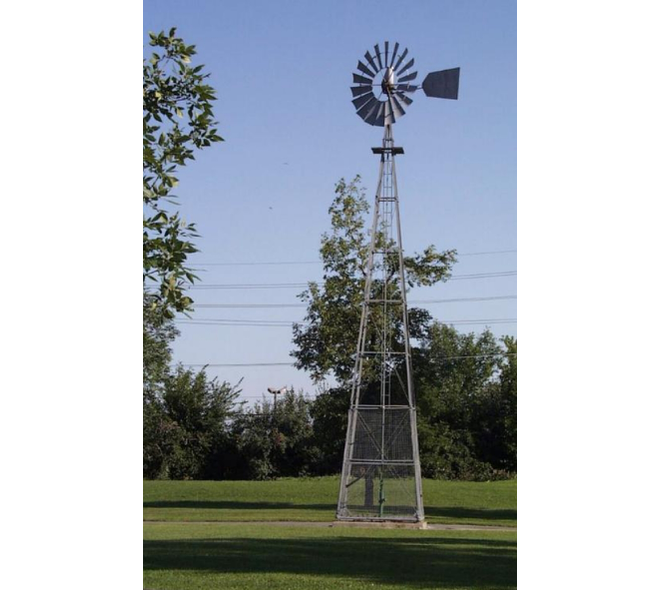

In [4]:
#sort dataset by height (8th in the column), rank from the biggest data to the smallest
height_sorted_dataset = sorted(dataset, key=lambda x: x[8], reverse = True) 
#list the item (url) on the first row (longest) 
height_url = height_sorted_dataset[0][9]
#load image, https://newbedev.com/python-how-to-load-image-from-url-in-python-code-example
response = requests.get(height_url)
img_widest = Image.open(BytesIO(response.content))
img_widest

### Question 2

Assuming the volume of an object is ``length x width x height``

1. Create a new 1-D array containing the volumes of each object 


2. Plot a histogram of the volumes of the **Top 30% by volume** in the museum collection. Label the axes appropriately.



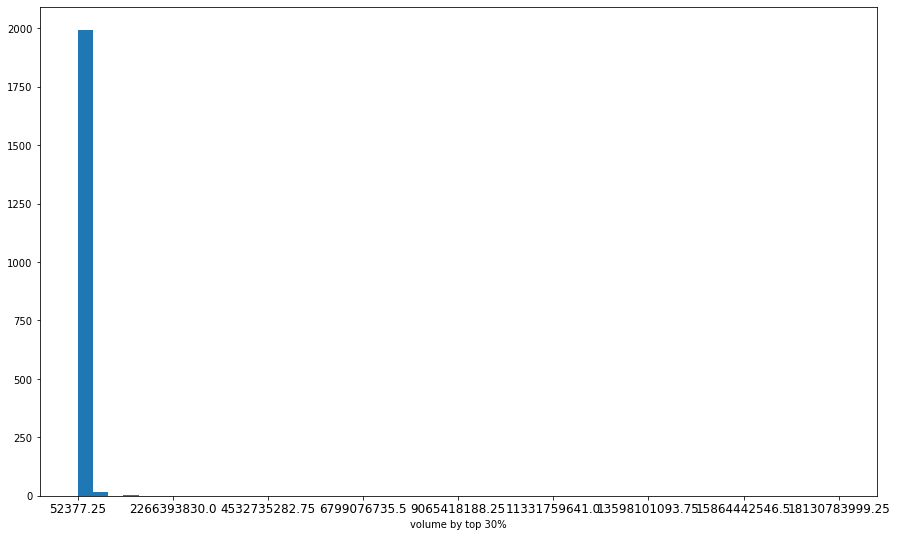

In [5]:
###1
#create a 1-D array and sort in reverse ranking
sorted_volume_a = sorted(dataset[:,6] * dataset[:,7] * dataset[:,8], reverse=True)
top_30_volume_a = sorted_volume_a[0:int(len(sorted_volume_a)*0.3)]
max_volume = max(top_30_volume_a)
min_volume = min(top_30_volume_a)

#plot a histogram 
fig, ax = plt.subplots(figsize=(15,9)) 
number_of_bins = 50
ax.set_xlabel('volume by top 30%')
xticks = np.arange(min_volume, max_volume,int(max_volume-min_volume)/8)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=12);
#ax.set_xscale('log')
h = ax.hist(top_30_volume_a, bins=number_of_bins)

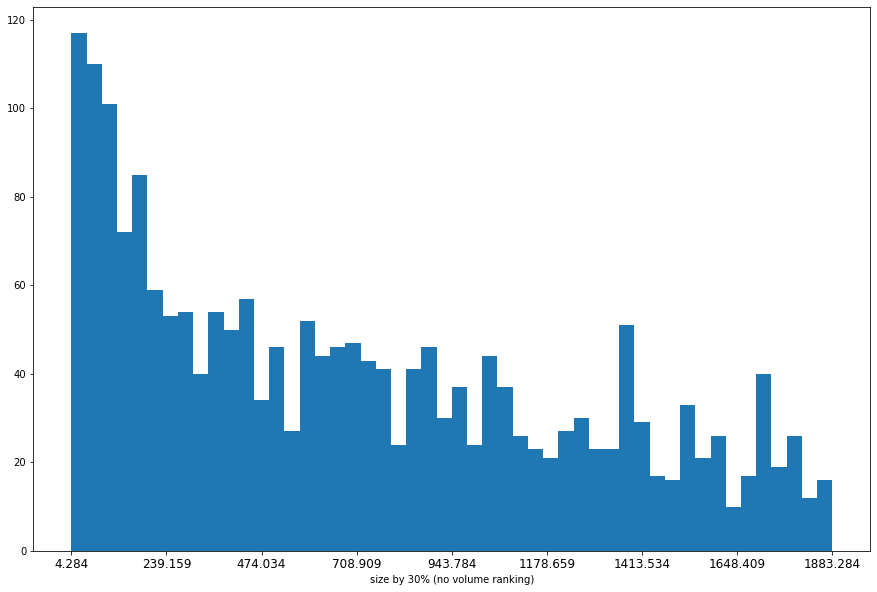

In [6]:
###1
#create a 1-D array and sort (non-reverse sorting)
sorted_volume_a = sorted(dataset[:,6] * dataset[:,7] * dataset[:,8])
top_30_volume_a = sorted_volume_a[0:int(len(sorted_volume_a)*0.3)]
max_volume = max(top_30_volume_a)
min_volume = min(top_30_volume_a)

#plot a histogram 
fig, ax = plt.subplots(figsize=(15,10)) 
number_of_bins = 50
ax.set_xlabel('size by 30% (no volume ranking)')
xticks = np.arange(min_volume, max_volume,int(max_volume-min_volume)/8) #step defined 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=12);
h = ax.hist(top_30_volume_a, bins=number_of_bins)

### Question 3 

What is the most common category and group? What percentage of the total items to they each make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?

In [7]:
#Methods 1: use Counter to caculate the most common (mode) of item name and frequency
#create a group array that contains on items in group (3th column)
#percentage = times of appearence / total amount
group_a = dataset[:,3] 
mode_name = Counter(group_a).most_common(1)[0][0]
mode_occur = Counter(group_a).most_common(1)[0][1]
print("the most common group: " + mode_name,"\noccurrence:",mode_occur, "\npercentage:",mode_occur/len(group_a)) 

the most common group: Technology 
occurrence: 2914 
percentage: 0.43247254378153754


In [8]:
#create a category array that contains on items in category (4th column)
category_a = dataset[:,4] 
mode_name = Counter(category_a).most_common(1)[0][0]
mode_occur = Counter(category_a).most_common(1)[0][1]
print("the most common category: " + mode_name,"\noccurrence:",mode_occur, "\npercentage:",mode_occur/len(category_a)) 

the most common category: Still cameras 
occurrence: 695 
percentage: 0.10314633422380529


In [9]:
#Methods 2: use for loop to iterate each item and count occurrence, store in dict
group_a = dataset[:,3] 
group_list = group_a.tolist() #tranform array to list 
frequency_group = {}
for i in group_list:
    if i in frequency_group:
        frequency_group[i] += 1
    else:
        frequency_group[i] = 1
print (frequency_group) 

category_a = dataset[:,4] 
category_list = category_a.tolist() #tranform array to list 
frequency_category = {}
for i in category_list:
    if i in frequency_category:
        frequency_category[i] += 1
    else:
        frequency_category[i] = 1
print (frequency_category) 

{'Transport': 1360, 'Nature': 613, 'Numbers': 116, 'Technology': 2914, 'Craft': 1503, 'Science': 232}
{'Aircraft parts': 60, 'Measurement-angles': 30, 'Automotive engineering': 34, 'Watches': 1, 'Motive power': 66, 'Operations': 65, 'Radiology': 41, 'Still cameras': 695, 'Miscellaneous': 190, 'Clothing': 66, 'Space science': 8, 'Clothing & personal safety apparatus': 5, 'Models': 291, 'User site': 10, 'Radio': 539, 'Still images': 87, 'Industrial equipment': 117, 'Vessel parts': 11, 'Navigation instruments & equipment': 15, 'Tools-Machine': 40, 'Power sources': 84, 'Civil engineering': 5, 'Commemorative': 48, 'Digital computing devices': 49, 'Aircraft instruments': 8, 'Music': 27, 'Demonstration & teaching equipment': 8, 'Sunshine intensity & duration measurement': 1, 'Observation equipment': 36, 'Medical equipment': 77, 'Mass/weight': 15, 'Television': 171, 'Human powered': 7, '"""Precipitation amount, rate & duration measurement"""': 1, 'Telegraphy': 373, 'Telephony': 262, 'Light & e

In [10]:
#Methods 3: use max() to find the most common element 
most_common_group = max(set(group_list), key = group_list.count)
most_common_category = max(set(category_list), key = category_list.count)
print (most_common_group,most_common_category)

Technology Still cameras


### Question 4

1. Plot date of objects against volume from everything added to the collection since 1850. Pick sensible ticks and labels for the axes, as well as a sensible scale.

Each item on the plot should have a different colour or symbol depending on its category as described by the ``group1`` heading .**EXTRA BONUS** If you can put in a legend mapping category to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, size and category. You can add some extra plots if you think it will help support any of your points. 


In [11]:
volume_a = dataset[:,6] * dataset[:,7] * dataset[:,8]
sorted_dataset_time = dataset[0:,2] > 1850 
new_sorted_dataset = dataset[sorted_dataset_time] 
new_sorted_volume_a = volume_a[sorted_dataset_time] 
new_sorted_dataset_date = new_sorted_dataset[:,2]

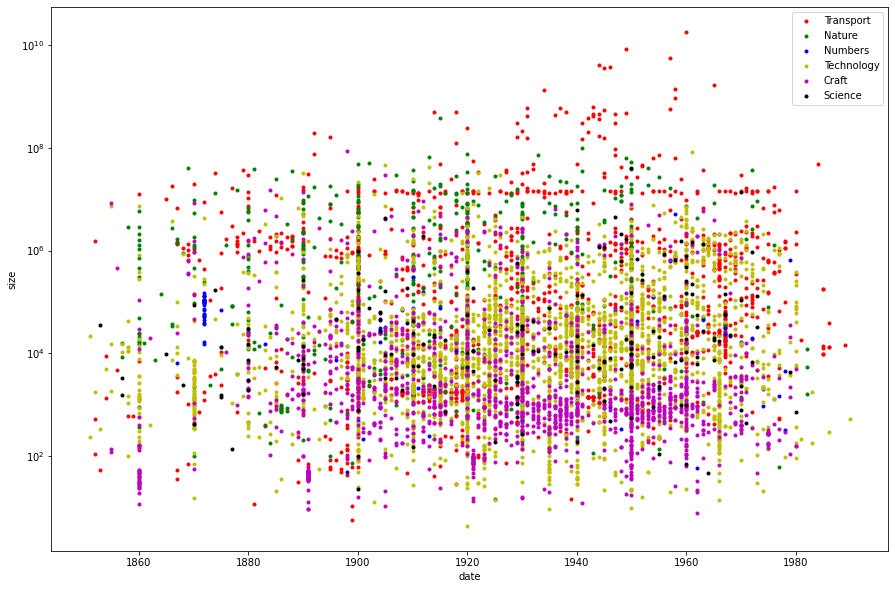

In [12]:
#A1 
#create a new array to contain filtered dataset
volume_a = dataset[:,6] * dataset[:,7] * dataset[:,8]
sorted_dataset_time = dataset[0:,2] > 1850 
new_sorted_dataset = dataset[sorted_dataset_time] 
new_sorted_volume_a = volume_a[sorted_dataset_time] 
new_sorted_dataset_date = new_sorted_dataset[:,2]

#create a list that contains volume grouped in 'category' 
new_sorted_dataset_list_transport = new_sorted_dataset[:,3] == "Transport"
list_transport = new_sorted_dataset[new_sorted_dataset_list_transport]
list_transport_date = list_transport[:,2]
list_transport_volume = new_sorted_volume_a[new_sorted_dataset_list_transport]

new_sorted_dataset_list_Nature = new_sorted_dataset[:,3] == "Nature"
list_Nature = new_sorted_dataset[new_sorted_dataset_list_Nature]
list_Nature_date = list_Nature[:,2]
list_Nature_volume = new_sorted_volume_a[new_sorted_dataset_list_Nature]

new_sorted_dataset_list_Numbers = new_sorted_dataset[:,3] == "Numbers"
list_Numbers = new_sorted_dataset[new_sorted_dataset_list_Numbers]
list_Numbers_date = list_Numbers[:,2]
list_Numbers_volume = new_sorted_volume_a[new_sorted_dataset_list_Numbers]

new_sorted_dataset_list_Technology = new_sorted_dataset[:,3] == "Technology"
list_Technology = new_sorted_dataset[new_sorted_dataset_list_Technology]
list_Technology_date = list_Technology[:,2]
list_Technology_volume = new_sorted_volume_a[new_sorted_dataset_list_Technology]

new_sorted_dataset_list_Craft = new_sorted_dataset[:,3] == "Craft"
list_Craft = new_sorted_dataset[new_sorted_dataset_list_Craft]
list_Craft_date = list_Craft[:,2]
list_Craft_volume = new_sorted_volume_a[new_sorted_dataset_list_Craft]

new_sorted_dataset_list_Science = new_sorted_dataset[:,3] == "Science"
list_Science = new_sorted_dataset[new_sorted_dataset_list_Science]
list_Science_date = list_Science[:,2]
list_Science_volume = new_sorted_volume_a[new_sorted_dataset_list_Science]


#make a dot graph & label key, colored by category
fig, ax = plt.subplots(figsize=(15,10))
ax.set_yscale('log')
ax.set_xlabel('date')
ax.set_ylabel('size')
plt.plot(list_transport_date,list_transport_volume,'ro', ms = 3, label = "Transport")
plt.plot(list_Nature_date,list_Nature_volume, 'go', ms = 3, label = "Nature")
plt.plot(list_Numbers_date,list_Numbers_volume,'bo', ms = 3, label = "Numbers")
plt.plot(list_Technology_date,list_Technology_volume,'yo', ms = 3, label = "Technology")
plt.plot(list_Craft_date,list_Craft_volume,'mo', ms = 3, label = "Craft")
plt.plot(list_Science_date,list_Science_volume,'ko', ms = 3, label = "Science")
plt.legend()

### A2

   Overall this graph shows that "technology" items (color-coded in yellow) contribute to the most data in the sample database and "craft" was second to the most. Most collection data were captured in between 1900s and 1960s as indicated by dot's distribution and density. Regarding collection size, transport collections have the biggest size (by volume) as the red dots display on the top of the plot. An overview is that Nature collection (green dots) has the biggest volume size on average whilst Craft has the smallest volume (purple). This is concluded due to its relative positions (e.g. green dots reach the top whilst purple reach the bottom) on the map. 